# Grouping poker hands together (Part 2: Preflop groups)

This notebook explores a method for grouping abstract groups of cards together. Lets load the cards from last time. And compute their histograms.


In [1]:
import pickle
cards1 = pickle.load(open("hole_cards(group1).cards", "rb"))
cards2 = pickle.load(open("hole_cards.cards", "rb"))
cards = {}
for c in cards1:
    cards[c] = cards1[c]
for c in cards2:
    cards[c] = cards2[c]
len(cards)

In [2]:
import numpy as np

hist = {}
for hole in cards:
    hist[hole] = np.histogram(cards[hole], range=(0,1), bins=10)

We will be comparing the cosine distance between individual hands. This will allow us to compute the difference between the cards histograms, and thus how different they are. I tried a few other methods for distance calculation but found that this worked best.

In [3]:
from math import log

def cosine_distance(hist1, hist2):
    res = 0
    for i in range(len(hist1[0])):
        res += hist1[0][i] * hist2[0][i]
    return res/(sum(map(lambda x: x*x, hist1[0]))*sum(map(lambda x: x*x, hist2[0])))**0.5

cosine_distance(hist["('S9', 'ST')"], hist["('ST', 'SJ')"])

0.98080834506996228

Lets measure the strategic difference between all pairs of card combinations.

In [4]:
from math import acos
arr = np.zeros(shape=(len(hist), len(hist)))
i,j = 0,0
card_index = {}
for k1 in hist:
    card_index[i] = k1 
    j = 0
    for k2 in hist:
        arr[i][j] = acos(cosine_distance(hist[k1], hist[k2]))
        j += 1
    i += 1

In [5]:
arr

array([[ 0.        ,  0.13832866,  0.22628844, ...,  0.54564853,
         0.49809608,  0.5833211 ],
       [ 0.13832866,  0.        ,  0.11655869, ...,  0.51930656,
         0.43120322,  0.49316373],
       [ 0.22628844,  0.11655869,  0.        , ...,  0.58837993,
         0.49099735,  0.53168689],
       ..., 
       [ 0.54564853,  0.51930656,  0.58837993, ...,  0.        ,
         0.28169537,  0.39356426],
       [ 0.49809608,  0.43120322,  0.49099735, ...,  0.28169537,
         0.        ,  0.16898751],
       [ 0.5833211 ,  0.49316373,  0.53168689, ...,  0.39356426,
         0.16898751,  0.        ]])

Now we can cluster the cards into groups using the DBSCAN algorithm. This allows us to see different "groups of cards"

In [32]:
from sklearn.cluster import DBSCAN
res = DBSCAN(eps=0.13, metric="precomputed")
ft = res.fit_predict(arr)
len(ft)

1326

In [33]:
max(ft)

17

The above array contains the set of cards for all the different card groups. Each number corresponds to a separate cluster. Thus cards in 3 all behave in a very similar way. Lets explore these clusters a bit. The next set of graphs show the behaviour of individual cards from the clusters.

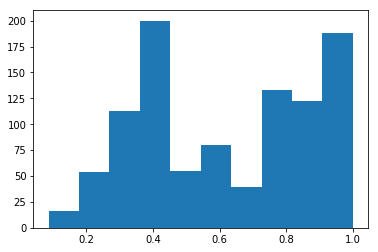

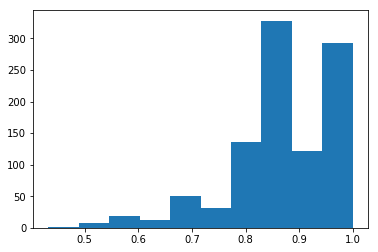

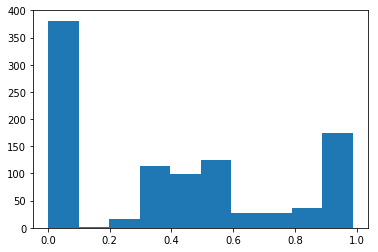

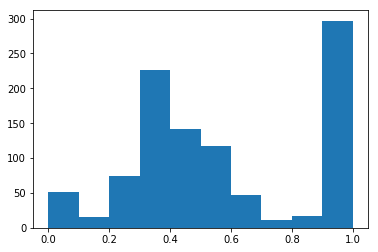

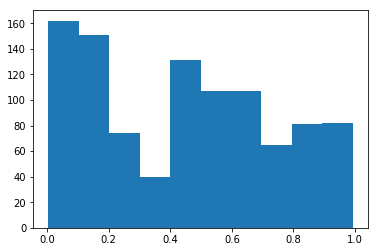

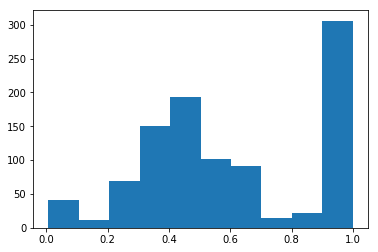

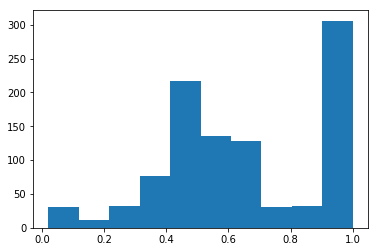

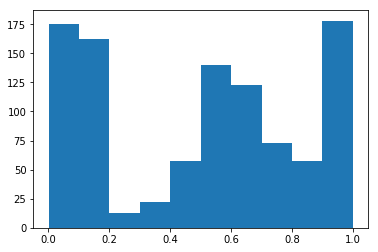

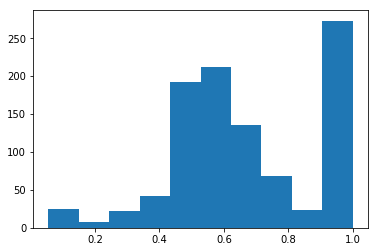

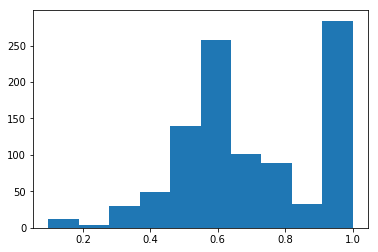

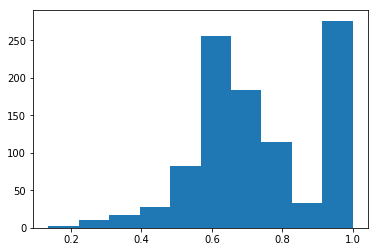

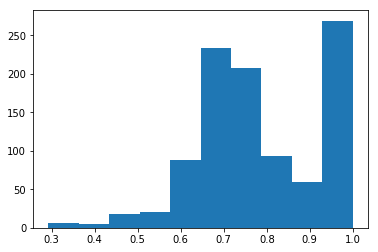

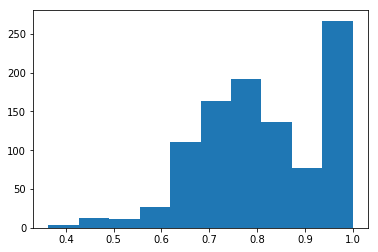

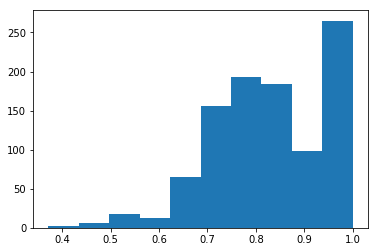

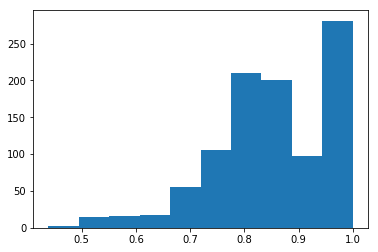

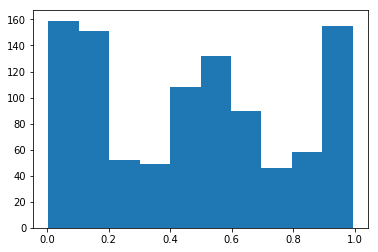

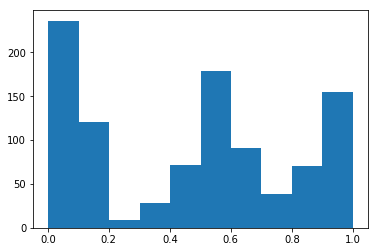

In [34]:
%matplotlib inline

from matplotlib import pyplot as plt 
for i in range(max(ft)):
    plt.hist(cards[card_index[list(ft).index(i)]])
    plt.show()

Lets see on average what each group of cards represents.

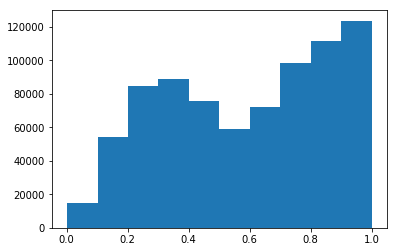

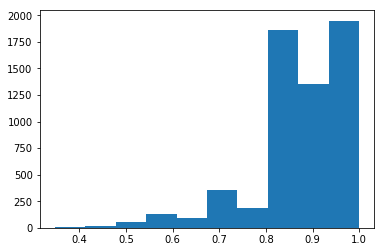

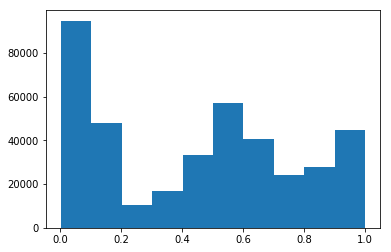

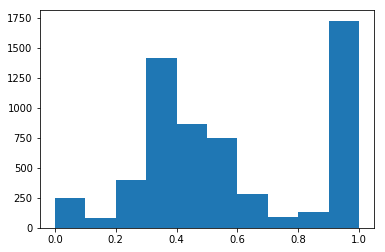

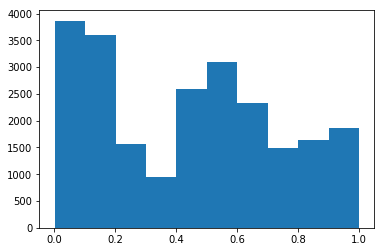

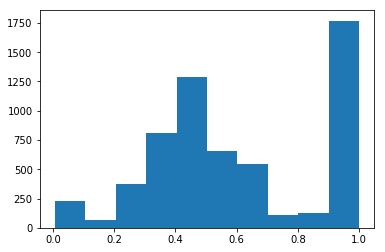

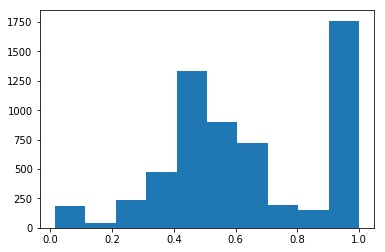

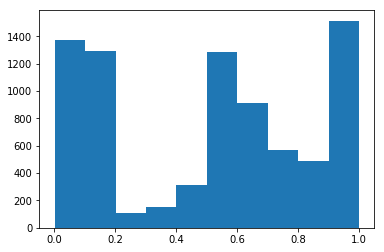

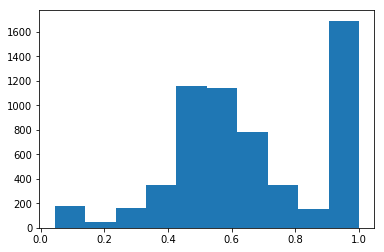

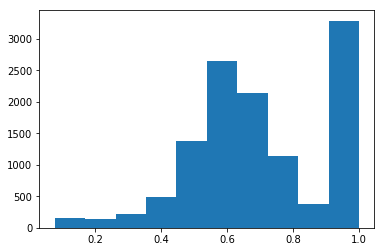

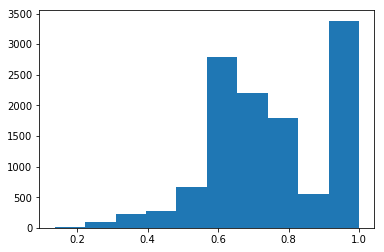

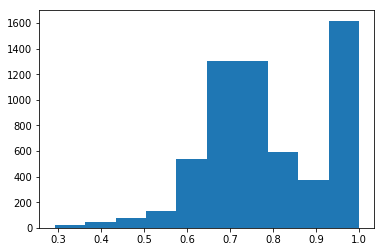

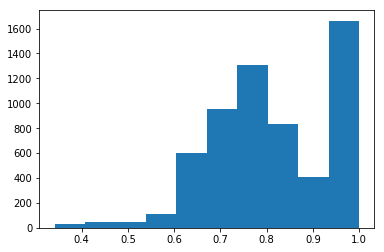

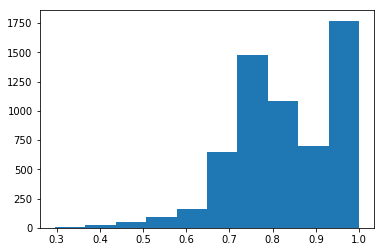

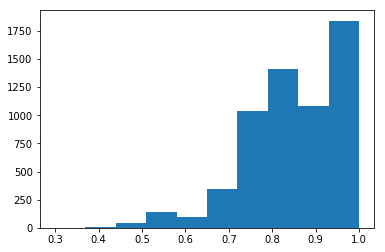

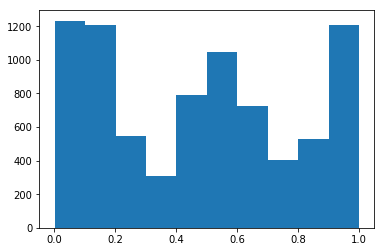

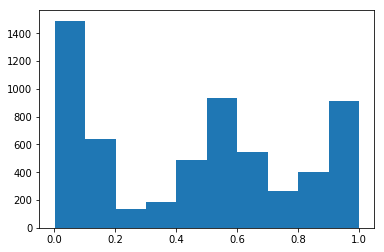

In [35]:
for i in range(max(ft)):
    indices = filter(lambda x: x[1] == i, zip(range(len(ft)),ft))
    lst = []
    for index,val in indices:
        lst += cards[card_index[index]]
    plt.hist(lst)
    plt.show()

In [139]:
card_index[list(ft).index(1)]

"('S2', 'S4')"

In [39]:
output = {}
for c in range(len(card_index)):
    output[card_index[c]] = ft[c]
    
pickle.dump(output, open("2hand_groups.cards", "wb+"))

In [40]:
output

{"('SA', 'S2')": -1,
 "('SA', 'S3')": 0,
 "('SA', 'S4')": 0,
 "('SA', 'S5')": 0,
 "('SA', 'S6')": 0,
 "('SA', 'S7')": 0,
 "('SA', 'S8')": 0,
 "('SA', 'S9')": 0,
 "('SA', 'ST')": 0,
 "('SA', 'SJ')": 0,
 "('SA', 'SQ')": 0,
 "('SA', 'SK')": 0,
 "('SA', 'DA')": 1,
 "('SA', 'D2')": 0,
 "('SA', 'D3')": 0,
 "('SA', 'D4')": 0,
 "('SA', 'D5')": 0,
 "('SA', 'D6')": 0,
 "('SA', 'D7')": 0,
 "('SA', 'D8')": 0,
 "('SA', 'D9')": 0,
 "('SA', 'DT')": 0,
 "('SA', 'DJ')": 0,
 "('SA', 'DQ')": 0,
 "('SA', 'DK')": 0,
 "('SA', 'HA')": 1,
 "('SA', 'H2')": 0,
 "('SA', 'H3')": 0,
 "('SA', 'H4')": 0,
 "('SA', 'H5')": 0,
 "('SA', 'H6')": 0,
 "('SA', 'H7')": 0,
 "('SA', 'H8')": 0,
 "('SA', 'H9')": 0,
 "('SA', 'HT')": 0,
 "('SA', 'HJ')": 0,
 "('SA', 'HQ')": 0,
 "('SA', 'HK')": 0,
 "('SA', 'CA')": 1,
 "('SA', 'C2')": 0,
 "('SA', 'C3')": 0,
 "('SA', 'C4')": 0,
 "('SA', 'C5')": 0,
 "('SA', 'C6')": 0,
 "('SA', 'C7')": 0,
 "('SA', 'C8')": 0,
 "('SA', 'C9')": 0,
 "('SA', 'CT')": 0,
 "('SA', 'CJ')": 0,
 "('SA', 'CQ')": 0,

In [49]:
for  i in output:
    if output[i] == 15:
        print(i)

('SA', 'DA')
('SA', 'HA')
('SA', 'CA')
('DA', 'HA')
('DA', 'CA')
('HA', 'CA')
